In [1]:
!pip3 install auto-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.5 MB 36.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 4.3 MB 72.5 MB/s 
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
     |████████████████████████████████| 4.4 MB 66.2 MB/s 
     |████████████████████████████████| 260 kB 72.9 MB/s 
     |████████████████████████████████| 46 kB 4.4 MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.15.0-py3-none-any.whl size=6641946 sha256=11feabfbf83a6b31c882c837f30ac271c1c02e3cad8c2392f7a28c4de4e632f0
  Stored in directory: /root/.cache/pip/wheels/26/57/ce/ca63ad74b90273f9a682028d187645a42dce5c5255228d46c8
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl size=7043 sha256=5b4134fb09cd0ea8ec27259e9afedb37c649701f45e9520dcaa6ab39e437ee84
  St

In [3]:
import numpy as np
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import sklearn.metrics
import autosklearn.classification
import autosklearn.metrics
import time

LOADING DATA

In [6]:
df= pd.read_csv('../content/train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


DATA CLEANING

In [7]:
input_cols = df.columns[:-1]
input_cols


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [8]:
target_col =  df.columns[-1]
target_col

'price_range'

In [9]:
inputs_df = df[list(input_cols)].copy()
inputs_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [10]:
targets = df[(target_col)]
targets

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

AUTOML MODEL

In [11]:
X = inputs_df
y = targets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size = 0.2, random_state=1)

In [28]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=100,
    per_run_time_limit=10
)

In [29]:
start = time.time()
history = automl.fit(X_train, y_train, dataset_name="Mobile-Price-Classification")
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 95.5398154258728s


Evaluar red

In [30]:
predictions = automl.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, predictions))

Accuracy score 0.9525


In [31]:
automl.show_models()

{3: {'model_id': 3,
  'rank': 1,
  'cost': 0.20454545454545459,
  'ensemble_weight': 0.2,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7fc526e109d0>,
  'balancing': Balancing(random_state=1, strategy='weighting'),
  'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7fc526ae74d0>,
  'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice at 0x7fc526aef090>,
  'sklearn_classifier': PassiveAggressiveClassifier(C=2.6029223727861803e-05, loss='squared_hinge',
                              max_iter=1024, random_state=1,
                              tol=4.631073253805713e-05, warm_start=True)},
 6: {'model_id': 6,
  'rank': 2,
  'cost': 0.14204545454545459,
  'ensemble_weight': 0.02,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7fc526e35290>,
  'balancing': Balancing(random_state=1),
  'feature_p

In [32]:
automl.leaderboard()

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
13,1,0.16,mlp,0.060606,3.799774
16,2,0.12,mlp,0.068182,1.168210
12,3,0.02,gradient_boosting,0.117424,1.103343
23,4,0.04,random_forest,0.138258,2.559322
6,5,0.02,random_forest,0.142045,2.289190
8,6,0.06,random_forest,0.142045,2.228223
15,7,0.22,lda,0.166667,0.815996
3,8,0.20,passive_aggressive,0.204545,0.878232
20,9,0.06,libsvm_svc,0.225379,0.946679


Predecir nuevos resultados

In [33]:
y_pred = automl.predict(X_test)
y_test = np.array(y_test)

error = 0;

for i in range(len(y_test)):
  print("valor real: ", y_test[i])
  print("valor estimado: ", y_pred[i])
  if(y_test[i] != y_pred[i]):
    error = error + 1;
  print("---------------------------------- ")

error_rate = error  / len(y_test) 
print("Error: ",error_rate)

valor real:  0
valor estimado:  0
---------------------------------- 
valor real:  0
valor estimado:  0
---------------------------------- 
valor real:  1
valor estimado:  1
---------------------------------- 
valor real:  1
valor estimado:  0
---------------------------------- 
valor real:  2
valor estimado:  2
---------------------------------- 
valor real:  2
valor estimado:  2
---------------------------------- 
valor real:  0
valor estimado:  0
---------------------------------- 
valor real:  2
valor estimado:  2
---------------------------------- 
valor real:  2
valor estimado:  2
---------------------------------- 
valor real:  3
valor estimado:  3
---------------------------------- 
valor real:  0
valor estimado:  0
---------------------------------- 
valor real:  3
valor estimado:  3
---------------------------------- 
valor real:  1
valor estimado:  1
---------------------------------- 
valor real:  1
valor estimado:  1
---------------------------------- 
valor real:  3
valor

In [41]:
pd.DataFrame(automl.cv_results_)

,mean_test_score,rank_test_scores,mean_fit_time,params,status,budgets,param_balancing:strategy,param_classifier:__choice__,param_data_preprocessor:__choice__,param_feature_preprocessor:__choice__,...,param_data_preprocessor:feature_type:numerical_transformer:rescaling:robust_scaler:q_max,param_data_preprocessor:feature_type:numerical_transformer:rescaling:robust_scaler:q_min,param_feature_preprocessor:fast_ica:n_components,param_feature_preprocessor:kernel_pca:coef0,param_feature_preprocessor:kernel_pca:degree,param_feature_preprocessor:kernel_pca:gamma,param_feature_preprocessor:nystroem_sampler:coef0,param_feature_preprocessor:nystroem_sampler:degree,param_feature_preprocessor:nystroem_sampler:gamma,param_feature_preprocessor:select_rates_classification:mode
0,0.869318,7,2.198992,"{'balancing:strategy': 'none', 'classifier:__c...",Success,0.0,none,random_forest,feature_type,no_preprocessing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.795455,14,0.878232,"{'balancing:strategy': 'weighting', 'classifie...",Success,0.0,weighting,passive_aggressive,feature_type,select_rates_classification,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fpr
2,0.000000,19,10.016671,"{'balancing:strategy': 'none', 'classifier:__c...",Timeout,0.0,none,random_forest,feature_type,polynomial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.907197,3,2.158888,"{'balancing:strategy': 'weighting', 'classifie...",Success,0.0,weighting,random_forest,feature_type,liblinear_svc_preprocessor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.857955,11,2.289190,"{'balancing:strategy': 'none', 'classifier:__c...",Success,0.0,none,random_forest,feature_type,select_percentile_classification,...,0.742792,0.011622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.890152,4,6.492488,"{'balancing:strategy': 'weighting', 'classifie...",Success,0.0,weighting,gradient_boosting,feature_type,polynomial,...,0.965272,0.041903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.857955,11,2.228223,"{'balancing:strategy': 'none', 'classifier:__c...",Success,0.0,none,random_forest,feature_type,feature_agglomeration,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.000000,19,10.014130,"{'balancing:strategy': 'weighting', 'classifie...",Timeout,0.0,weighting,gradient_boosting,feature_type,polynomial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.869318,7,3.322499,"{'balancing:strategy': 'weighting', 'classifie...",Success,0.0,weighting,gradient_boosting,feature_type,select_percentile_classification,...,0.813594,0.034129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.876894,6,1.256317,"{'balancing:strategy': 'none', 'classifier:__c...",Success,0.0,none,gradient_boosting,feature_type,select_percentile_classification,...,0.810188,0.236563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


curva de precision

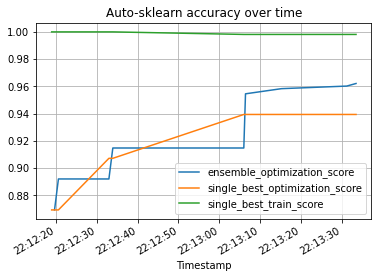

In [42]:
poT = automl.performance_over_time_
poT.plot(
    x="Timestamp",
    kind="line",
    legend=True,
    title="Auto-sklearn accuracy over time",
    grid=True,
)
plt.show()